# Flower image classifier with Fastai library

After having completed Udacity's image classifier project was I curious to try using the fastai library to see how much I could improve the results of my flower classifier. The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models. 

Turns out I was able to go from **78% to 98.5% accuarcy** with very little effort and in about 3 to 4 times less training time. 

When working on my Udacity project, while I didn't spend days experimenting, I definitely tried different learning rates, different architectures, played with the number of epochs, etc. 
Getting the right parameters to create a good model takes experience and practice. 

The fastai library is concieved to optimize a model in a state of the art way, yielding competitive results. 

Let's see how to use the library. 

## Setup
This notebook was hosted on Google Cloud Platform (GCP) and configured to use PyTorch 1.0.0, fastai 1.0.2 and a GPU-enabled Jupyter Notebook environment. I used [this guide](https://course.fast.ai/start_gcp.html) to get started.  

In [1]:
# imports
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
from PIL import ImageFile # used to avoid an error later on
import tarfile

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Uploading the flower dataset 
I downloaded the image dataset from Udacity, created a .tar archive and uploaded it to GCP. We now need to extract the dataset. 

In [ ]:
# untar and extract our dataset
tf = tarfile.open("flowers.tar")
tf.extractall()

## Looking at the data

The flower dataset is comprised of 102 flower species. Our model will need to learn to differentiate between these 102 distinct categories. 

The first thing we need to do is to take a look at our data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Fastai provides an easy way to do this. We can take a look at how the data directories are structured, what the labels are and what some sample images look like with just a few lines of code. 

In [3]:
# Create a path object of our dataset
path = Path('flowers')

# .ls() method to view what's in the file - we have our training, validation and testing set
path.ls()

[PosixPath('flowers/models'),
 PosixPath('flowers/train'),
 PosixPath('flowers/valid'),
 PosixPath('flowers/test')]

In this particular dataset, labels are stored in the foldernames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this: `ImageDataBunch.from_folder` 

In [4]:
# transform our data - resize, center crop, randomflips, etc, all done with get_transforms()
tfms = get_transforms()

# create a ImageDataBunch object 
data = ImageDataBunch.from_folder(Path('flowers'), ds_tfms=tfms, size=299, bs=32, test='test'
                                  ).normalize()

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
24, 84, 30, 75, 44
  if getattr(ds, 'warn', False): warn(ds.warn)


The batch size we chose was 32. The GPU we are using only has 8gbs of ram so it's the maximum I could get without running into an error when training.

Also, I used an image size of 299. I also tested the more classic 224 size, but my model ended up being slightly less accurate. 

In [5]:
# View the structure of our data
data

ImageDataBunch;

Train: LabelList (6212 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
87,87,87,87,87
Path: flowers;

Valid: LabelList (772 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
87,87,87,87,87
Path: flowers;

Test: LabelList (819 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: flowers

In [6]:
# Print all our flower classes or labels
print(data.classes)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '25', '26', '27', '28', '29', '3', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '76', '77', '78', '79', '8', '80', '81', '82', '83', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


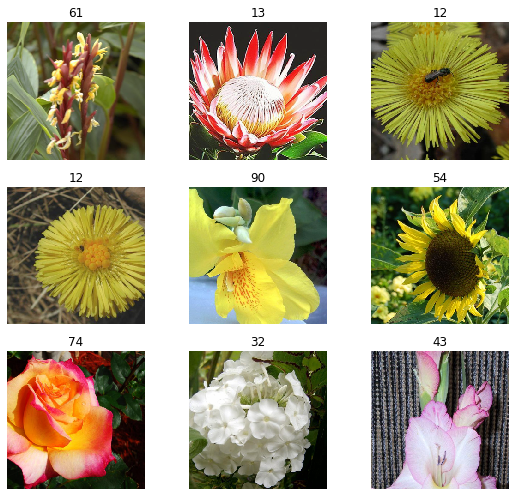

In [7]:
# View a sample of our data
data.show_batch(rows=3, figsize=(8,7))



## Training: resnet50

We're already setup to train our data. We will use a convolutional neural network backbone and a fully connected head with a single hidden layer as a classifier. There is one architecture that works really well almost all the time: resnet. We chose resnet50 because it is a good size given our GPU limitations. 

We will use the cnn_learner() which ensures that our data is optimized with the best possible training parameters. This is the whole point of using the fastai library.

Finally, we'll train our data on 5 epocs. 

In [8]:
# We're setting load_truncated_images to True otherwise we get an error when training the data
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [9]:
# Create a learner which uses resnet50 and prints out the accuracy for each epoch. 
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [10]:
# View our learn object and the structure of resnet50
learn

Learner(data=ImageDataBunch;

Train: LabelList (6212 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
87,87,87,87,87
Path: flowers;

Valid: LabelList (772 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
87,87,87,87,87
Path: flowers;

Test: LabelList (819 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: flowers, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1

We can use fit(), but the better way is to use fit_one_cycle() which is implemented by fastai. [Here is an article that explains why it's more accuracte](https://towardsdatascience.com/finding-good-learning-rate-and-the-one-cycle-policy-7159fe1db5d6). In 2019 it's the way to go for deep learning.  

In [11]:
# Use fit_one_cycle instead of fit
learn.fit_one_cycle(5) 

epoch,train_loss,valid_loss,accuracy,time
0,1.349979,0.443760,0.913212,02:01
1,0.476306,0.202386,0.946891,01:53
2,0.211075,0.138853,0.965026,01:53
3,0.117849,0.117531,0.974093,01:53
4,0.063566,0.112072,0.975389,01:53


Great! We're already at 97.5% accuracy. Let's now interpret our results. 

## Results

We will first see which were the categories that the model got most confused with. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

In [19]:
# Create an interp object that will allow us to interpret our result
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

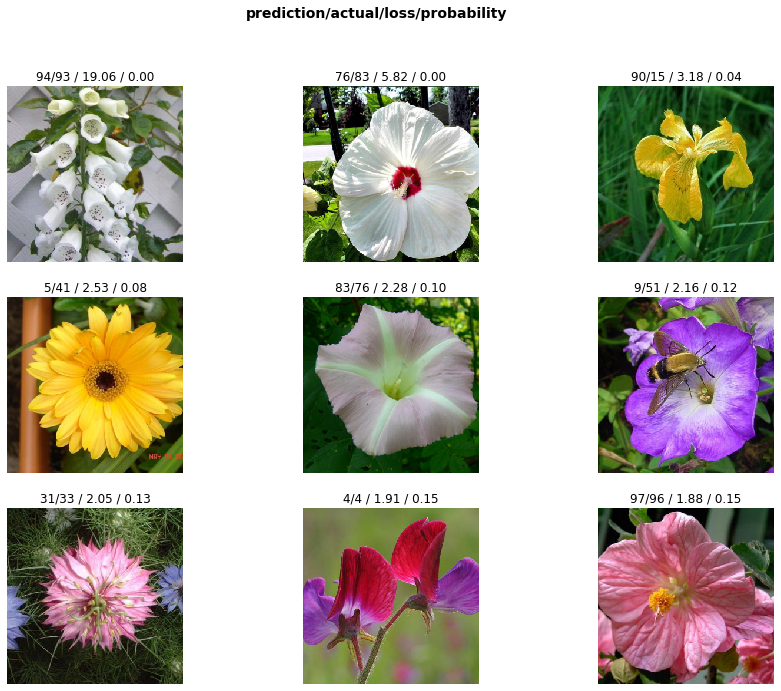

In [20]:
# Plot a sample of the images that the model got wrong
interp.plot_top_losses(9, figsize=(15,11))

A great feature of fastai is that we can print out the images of the flowers that our model got wrong. 

The numbers on top of each image corresponds to: the predicted category, the actual category, the loss, and the probability of the actual class

In [29]:
interp.most_confused(min_val=1)

[('13', '29', 1),
 ('15', '90', 1),
 ('19', '55', 1),
 ('20', '88', 1),
 ('33', '31', 1),
 ('36', '85', 1),
 ('4', '9', 1),
 ('41', '5', 1),
 ('51', '76', 1),
 ('51', '9', 1),
 ('72', '31', 1),
 ('76', '51', 1),
 ('76', '83', 1),
 ('80', '78', 1),
 ('82', '51', 1),
 ('83', '76', 1),
 ('87', '81', 1),
 ('93', '94', 1),
 ('94', '3', 1),
 ('96', '97', 1),
 ('97', '96', 1)]

It's a little hard to interpret because our labels are not the names of the actual flowers, they are just numbers. Included in the github is a mapping of flower names to numbers. 
We can see that our model made around 25 mistakes, but never the same mistake. Let's look more closely at one of them.  

Label 13 corresponds to the "king protea" flower
Label 10 corresponds to the "atichoke" flower

Googling both these flowers reveals that for some images, they can in fact be quite similar. It's not surprising that our model confused them once. 

## Unfreezing, fine-tuning, and learning rates

By default, when we have our cnn_learner, and when we fit_one_cycle, it will just fine tune the last part of our model, not the convolutional neural network. This is why it trains very fast. It just trains the last layers. However, to improve our model we'll want to train the whole model. This is why we unfreeze.

Since our model is working as we expect it to, we will *unfreeze* it and train some more.

In [22]:
learn.unfreeze()

What is the fastest I can train this NN at, without making it fail too much? We run learn.recorder.plot() to plot the result of our Learning Rate finder. This shows the learning rate and the resulting error. 

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


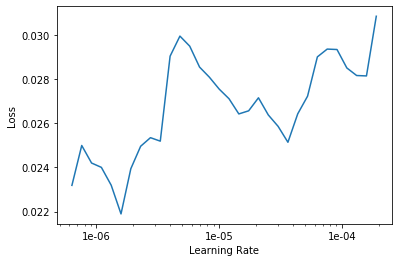

In [24]:
learn.recorder.plot()

Looking at the documentation, by default fit_one_cycle's learning rate is 0.003. We can see with this plot that the more the learning rate approaches 0.003, the higher the error. This means that we want to have a smaller learning rate to get a better result. 

Let's fit our model again with a smaller LR to start. But there's not point in learning all the layers equaly because the tail of our model was already trained and was very good at predicting our flowers. We can use a higher lr for that part. Therefore, we can pass a range of learning rates with the slice() method. This means we start with a learning rate that is very small at the beginning, and we gradually increase the learning rate for the later layers. 

In [25]:
# fit_one_cycle with a range of learning rates
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.037404,0.100886,0.972798,02:31
1,0.043396,0.080886,0.984456,02:31
2,0.028700,0.081398,0.983161,02:31
3,0.020443,0.081295,0.984456,02:31


As we can see the time to train 1 epoch or cycle is higher than the first time we trained because we unfreezed all the layers, so there are more layers to train. 

The accuracy of our model is 98.44%! That's pretty increadible considering our total training time was under 15 minutes. Compared to my last model which predict 78% accuracy, this is a significant upgrade. 

We'll end by saving our model.  

In [27]:
learn.save('flowers-stage-1')